In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Data:
    def __init__(self, times=1000):
        self.times = times

    def constructData(self):
        times = self.times
        stocks = np.random.randn(10, times)
        for m in range(-4, 6):
            stocks[m+4] += m
        return stocks

class Action:
    def __init__(self, estimation, timestamp, buyCount):
        self.estimation = estimation
        self.timestamp = timestamp
        self.buyCount = buyCount

    def random_action(self):
        res = np.random.randint(10)
        return res

    def UCB_action(self, c=2):
        estimation = self.estimation
        timestamp = self.timestamp
        buyCount = self.buyCount
        scores = estimation + c * np.sqrt(np.log(timestamp + 1) / (buyCount + 1))
        # res = np.where(scores == np.max(scores))[0]
        res = np.random.choice(np.where(scores == np.max(scores))[0])
        return res

    def gradient_action(self):
        estimation = self.estimation
        P = np.exp(estimation) / np.sum(np.exp(estimation))
        res = np.random.choice(range(10), p=P)
        return res

    def standard_action(self):
        estimation = self.estimation
        res = np.random.choice(np.where(estimation == np.max(estimation))[0])
        return res


class Bandit:
    def __init__(self, epsilon, method):
        self.epsilon = epsilon
        self.data = Data().constructData()
        self.estimation = np.zeros(10)
        self.buyCount = np.zeros(10)
        self.timestamp = 0
        self.method = method
        self.baseline = 0
        self.alpha = 0.1


    def reset(self):
        self.timestamp = 0
        self.data = Data().constructData()
        self.buyCount = np.zeros(10)
        self.estimation = np.zeros(10)
        self.baseline = 0

    def act(self):
        method = self.method
        a = Action(self.estimation, self.timestamp, self.buyCount)
        if np.random.rand() < self.epsilon:
            res = a.random_action()
#             print("random!")
        elif method == 'g':
            res = a.gradient_action()
        elif method == 'u':
            res = a.UCB_action()
        else:
            res = a.standard_action()
        self.buyCount[res] += 1
        return res

    def backup(self):
        maxReward = max(self.data[:, self.timestamp])
        act = self.act()
        reward = self.data[act][self.timestamp]
        baseline = self.baseline
        estimation = self.estimation
        baseline += (reward - baseline) / (self.timestamp + 1)

        if self.method == 'g':
            onehot = np.zeros(10)
            onehot[act] = 1
            P = np.exp(estimation) / np.sum(np.exp(estimation))
            estimation += self.alpha * (reward - baseline) * (onehot - P)
        else:
            estimation[act] += (reward - estimation[act]) / self.buyCount[act]

        self.timestamp += 1

        return reward, maxReward


def train(Bandit, spsilon=0.1, method='', epochs=200, print_every_n=50):
    bandit = Bandit
    times = len(bandit.data[0])
    rewards = np.zeros((epochs, times))
    optimalCount = np.zeros((epochs, times))
    for i in range(epochs):
        bandit.reset()
        if i % print_every_n == 0 and i != 0:
            print(i / epochs * 100, "%", end=" ")
        for t in range(times):
            reward, maxReward = bandit.backup()
            rewards[i, t] = reward
            if reward == maxReward:
                optimalCount[i, t] += 1
    print(optimalCount.shape)
    meanopt = optimalCount.mean(axis=0)
    meanreward = rewards.mean(axis=0)
    return meanopt, meanreward

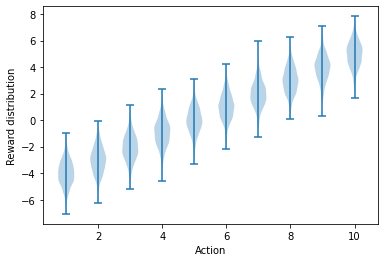

In [11]:
# Data Distribution
plt.violinplot(dataset=Data().constructData().T)
plt.xlabel("Action")
plt.ylabel("Reward distribution")
plt.show()

25.0 % 50.0 % 75.0 % (200, 1000)
25.0 % 50.0 % 75.0 % (200, 1000)
25.0 % 50.0 % 75.0 % (200, 1000)


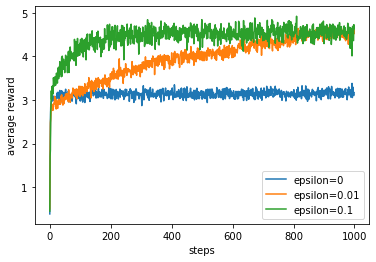

In [15]:
# use Epsilon-Greedy Methods with different epsilons

epsilons = [0, 0.01, 0.1]
bandits = []
for e in epsilons:
    bandits.append(Bandit(epsilon=e))
    
for i in range(len(epsilons)):
    best_action_counts, rewards = train(bandits[i])
    plt.plot(rewards, label='epsilon='+str(epsilons[i]))

# best_action_counts, rewards = train(Bandit(epsilon=1))
# plt.plot(rewards)

plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()
plt.show()

25.0 % 50.0 % 75.0 % (200, 1000)
25.0 % 50.0 % 75.0 % (200, 1000)
25.0 % 50.0 % 75.0 % (200, 1000)


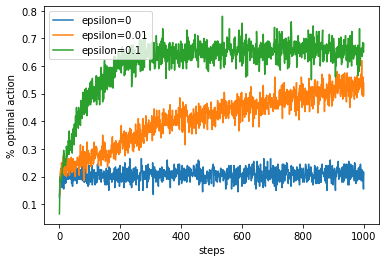

In [19]:
# use Epsilon-Greedy Methods with different epsilons

epsilons = [0, 0.01, 0.1]
bandits = []
for e in epsilons:
    bandits.append(Bandit(epsilon=e))

for i in range(len(epsilons)):
    best_action_counts, rewards = train(bandits[i])
    plt.plot(best_action_counts, label='epsilon='+str(epsilons[i]))

plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

25.0 % 50.0 % 75.0 % (200, 1000)
25.0 % 50.0 % 75.0 % (200, 1000)
25.0 % 50.0 % 75.0 % (200, 1000)


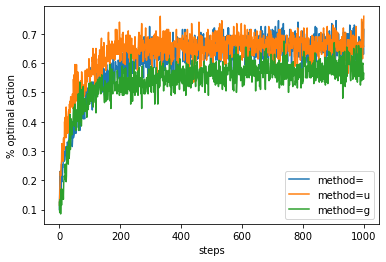

In [20]:
# comparison between Epsilon-Greedy Methods, UCB Methods, and Gradient Methods

bandits = []
method = ['', 'u', 'g']
for m in method:
    bandits.append(Bandit(epsilon=0.1, method=m))

for i in range(len(epsilons)):
    best_action_counts, rewards = train(bandits[i])
    plt.plot(best_action_counts, label='method='+method[i])

plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()